In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


# 0.1 reading data from kaggle

In [ ]:
pip install kaggle

In [ ]:
# mv /content/drive/MyDrive/kaggle.json /root/.kaggle/

In [ ]:
# mv /root/.kaggle/kaggle.json /content/drive/MyDrive/

mv: failed to access '/content/drive/MyDrive/': Transport endpoint is not connected


In [ ]:
!kaggle --version

Kaggle API 1.5.16


## create a file kaggle.json by requesting and API key to kaggle (under account)
## https://www.kaggle.com/docs/api
## and upload it to your google drive.
## Upload and read in the credential, store them as environmental variables

### Before class
Please register for an account at kaggle.com, all the work we will do together in class as well as your next homework will require it.
To register do the following:
- go to kaggle.com
- click on “Register” in the upper right corner
select either Register with Google, or Register with your email (it’s up to you)
- follow the instructions provided by kaggle to create an account (enter your email address, create a password, and choose a username), all of which are up to you, this will be your account after all
- Make sure that at the end, you have an account that you can log in with, and be logged in and ready next class

### In class

- Go to https://www.kaggle.com/ and sign in
- click on the icon of your avatar on the top right
- select account from the drop menu
- scroll down to API and click `create New API Token`. This will download a json file on your computer
- open google drive at https://drive.google.com/drive/u/0/my-drive in your browser
-  upload the kaggle.json file from your laptop to the drive


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


make sure the file is there: this cell should return "kaggle.json"

In [ ]:
ls kaggle.json

kaggle.json


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


the next cell changes who can access this file. Tokens are a seriously private thing! they are used to access sites. If someone were to hack the kaggle site and steal information from the user using your token you would be legally responsible for that! So keep your files secret. Don't share them with any one, don't print the content of the json file we use in your notebook.

In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!chmod 600 kaggle.json

In [ ]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = user['key']

In [ ]:
#check that it worked by listing the kaggle datasets
!kaggle competitions list

ref                                                                               deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/open-problems-single-cell-perturbations       2023-11-30 23:59:00  Featured          $100,000        682           False  
https://www.kaggle.com/competitions/stanford-ribonanza-rna-folding                2023-12-07 23:59:00  Research          $100,000        413           False  
https://www.kaggle.com/competitions/optiver-trading-at-the-close                  2023-12-20 23:59:00  Featured          $100,000       2037           False  
https://www.kaggle.com/competitions/nfl-big-data-bowl-2024                        2024-01-08 23:59:00  Analytics         $100,000          0           False  
https://www.kaggle.com/competitions/linking-wr

create a directory for these data


In [ ]:
!mkdir kaggleTitanic

mkdir: cannot create directory ‘kaggleTitanic’: File exists


move to that directory


In [ ]:
cd kaggleTitanic

/content/gdrive/My Drive/kaggleTitanic


download the titanic data into the directory you created for it

In [ ]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

gender_submission.csv  test.csv  TitanicTree  TitanicTree.pdf  titanic.zip  train.csv


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

read in the data

In [ ]:
titanic = pd.read_csv("train.csv").dropna(subset=["Survived", "Sex", "Pclass", "Age"])

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.shape

(714, 12)

In [ ]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 0.2 data cleaning and wrangling

### turn gender into numeric

In [ ]:
titanic["gender"] = titanic.Sex.map({'male':0, 'female':1})

### throw away data that you will not use

In [ ]:
titanic_short = titanic[["Pclass","gender","Age"]]
titanic_short

,Pclass,gender,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [ ]:
titanic_short.values

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       ...,
       [ 1.,  1., 19.],
       [ 1.,  0., 26.],
       [ 3.,  0., 32.]])

# IDEALLY GET TO HERE IN CLASS TOGETHER - the rest can just be left in the notebook for the students to inspect. Its the by-hand flow chart I made for the slides

# 0.3 test the purity of various splits
## first split

### split by gender

In [ ]:
print ("Survived fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.gender.values == 0).sum(),
     ((titanic_short.gender.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.gender.values == 1).sum()))

Survived fraction
 M     F 
 0.21 0.75


In [ ]:
print ("Died fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 0)).sum() * 1.0 /
       (titanic_short.gender.values == 0).sum(),
       ((titanic_short.gender.values == 1) & (titanic.Survived.values == 0)).sum() * 1.0 /
      (titanic_short.gender.values == 1).sum()))

Died fraction
 M     F 
 0.79 0.25


### split by age (at 6.5)

In [ ]:
print ("Survived fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Age.values <=6.5).sum()))

Survived fraction
 >6.5  <6.5 
 0.39  0.70


In [ ]:
print ("Died fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 0)).sum() * 1.0 /
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 0)).sum() * 1.0 /
       (titanic_short.Age.values <=6.5).sum()))

Died fraction
 >6.5  <6.5 
 0.61  0.30


### split by travel class

In [ ]:
print ("Survived fraction\n 1st   2nd \n {0:.2f}  {1:.2f}".format
     (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 1).sum(),
       ((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 2).sum()))

Survived fraction
 1st   2nd 
 0.66  0.48


In [ ]:
print ("Survived fraction\n 2nd   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Pclass.values == 2).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 2nd   3rd 
 0.48  0.24


In [ ]:
print ("Survived fraction\n 1st   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Pclass.values == 1).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 /
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 1st   3rd 
 0.66  0.24


In [ ]:
print ("Survived fraction\n 1st   2nd or 3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       (titanic_short.Pclass.values == 1).sum(),
        (((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 2)) & (titanic.Survived.values == 1)).sum() * 1.0 /
      ((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 3)).sum()))

Survived fraction
 1st   2nd or 3rd 
 0.66  0.47


# The purest split is by gender, so that is chosen as the first node

# second split

### by travel class

In [ ]:
print ("Survived fraction of females: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
       (((titanic_short.gender.values == 1) &
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & (titanic_short.Pclass.values == 1)).sum(),
        ((titanic_short.gender.values == 1) &
        ~(titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & ~(titanic_short.Pclass.values == 1)).sum()))

Survived fraction of females: 
 1st   2nd,3rd
 0.96  0.65


In [ ]:
print ("Survived fraction of males: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
        (((titanic_short.gender.values == 0) &
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (titanic_short.Pclass.values == 1)).sum(),
        ((titanic_short.gender.values == 0) &
        (~(titanic_short.Pclass.values == 1)) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (~(titanic_short.Pclass.values == 1))).sum() ))

Survived fraction of males: 
 1st   2nd,3rd
 0.40  0.15


### by age

In [ ]:
print ("Survived fraction of females: \n <6.5  >=6.5   \n {0:.2f} {1:.2f}".format
        (((titanic_short.gender.values == 1) &
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values < 6.5)).sum(),

       ((titanic_short.gender.values == 1) &
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of females: 
 <6.5  >=6.5   
 0.74 0.76


In [ ]:
print ("Survived fraction of males: \n <6.5 >=6.5   \n {0:.2f}  {1:.2f}".format
     (((titanic_short.gender.values == 0) &
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values < 6.5)).sum(),
     ((titanic_short.gender.values == 0) &
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of males: 
 <6.5 >=6.5   
 0.67  0.18


## The purest split is
## - for females by travel class
## - for males by age

# 0.4 actually run a tree model

Below I run a tree model, a simple Decision tree. Check out the syntax of the call and the hyperparameters. Next you will run tree ensamble models by yourself for the homework, but the syntax is generally the same

In [ ]:
from sklearn import tree
clf =  tree.DecisionTreeClassifier(max_depth=3, criterion="gini",
                        random_state=222).fit(titanic_short.values,
                                              titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.8081232492997199

# 0.5 create the dendrogram viz

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, feature_names=titanic_short.columns,
                                out_file=None)
graph = graphviz.Source(dot_data)

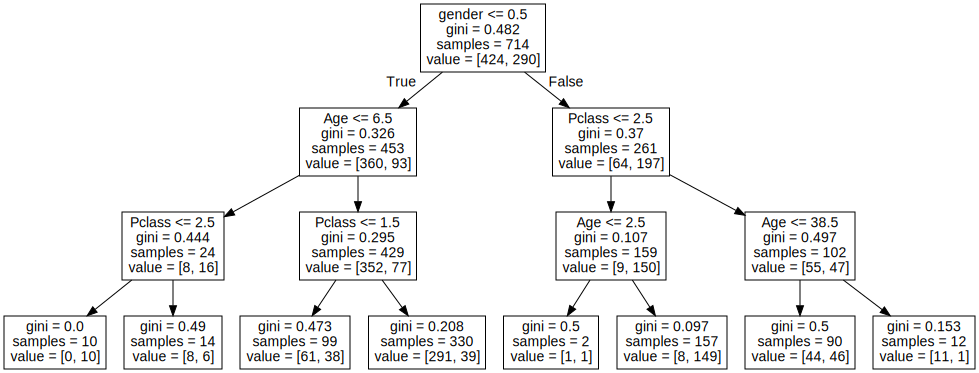

In [ ]:
graph

In [ ]:
graph.render("TitanicTree")

'TitanicTree.pdf'

## THIS IS WHERE THE HOMEWORK YOU DO BY YOURSELF STARTS

# 1 run ensamble method:
## changing model to Random Forest

In [ ]:
titanic_short

,Pclass,gender,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [ ]:
from sklearn.model_selection import train_test_split
#your code
X_train, X_test, y_train, y_test = train_test_split(titanic_short.values, titanic["Survived"], test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test

(array([[ 3.,  1., 31.],
        [ 3.,  0., 26.],
        [ 3.,  0., 30.],
        ...,
        [ 1.,  1., 41.],
        [ 3.,  0., 33.],
        [ 3.,  0., 33.]]),
 array([[ 2. ,  0. , 42. ],
        [ 2. ,  0. ,  3. ],
        [ 2. ,  1. , 29. ],
        [ 1. ,  1. , 24. ],
        [ 3. ,  0. , 43. ],
        [ 2. ,  0. ,  8. ],
        [ 3. ,  1. , 33. ],
        [ 2. ,  1. , 54. ],
        [ 3. ,  1. , 28. ],
        [ 3. ,  1. , 23. ],
        [ 1. ,  1. , 17. ],
        [ 2. ,  1. , 32.5],
        [ 1. ,  0. , 31. ],
        [ 3. ,  0. , 38. ],
        [ 1. ,  1. , 35. ],
        [ 2. ,  0. , 23. ],
        [ 3. ,  0. , 23.5],
        [ 1. ,  1. , 16. ],
        [ 2. ,  0. , 27. ],
        [ 1. ,  1. , 54. ],
        [ 3. ,  1. , 16. ],
        [ 2. ,  1. , 50. ],
        [ 3. ,  1. ,  9. ],
        [ 1. ,  0. , 35. ],
        [ 3. ,  0. , 22. ],
        [ 3. ,  0. , 17. ],
        [ 3. ,  0. , 16. ],
        [ 3. ,  0. , 26. ],
        [ 3. ,  1. , 14.5],
        [ 3. ,  0. , 38

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((571, 3), (143, 3), (571,), (143,))

# 1. Split the data into a training and a test set

In [ ]:
from sklearn import ensemble
rf =  ensemble.RandomForestClassifier(max_depth=12, criterion="gini", random_state=455).fit(X_train, y_train)

print ("train score %.2f"%rf.score(X_train, y_train),
       "test score %.2f"%rf.score(X_test, y_test))

train score 0.91 test score 0.76


## change the hyper parameters and check the train and test score

changing max depth and check the score of the model

In [ ]:
rf =  ensemble.RandomForestClassifier(max_depth=6, criterion="gini", random_state=455).fit(X_train, y_train)

print ("train score %.2f"%rf.score(X_train, y_train),
       "test score %.2f"%rf.score(X_test, y_test))

train score 0.87 test score 0.77


try another max depth and check the score of the model

In [ ]:
rf =  ensemble.RandomForestClassifier(max_depth=9, n_estimators=100, criterion="gini", random_state=455).fit(X_train, y_train)
rf.score(X_train, y_train)
print ("train score %.2f"  %rf.score(X_train, y_train), "\ntest score %.2f"%rf.score(X_test, y_test))

train score 0.90 
test score 0.78


Which model is better? why? what would you report as your model accuracy?

The model that is better is the second one because the train and test scores are closer together compared to the other two with their different max depth. The difference of the second one is 0.10 while it varies for the rest.

## changing model: do the same with the Gradient Boosted Trees

In [ ]:
gbt =  ensemble.GradientBoostingClassifier(max_depth=4, random_state=1412).fit(X_train, y_train)
gbt.score(X_train, y_train)
print ("score %.2f"  %gbt.score(X_train, y_train))

score 0.89


# 2 feature importance

TARA - Missing code for the feature importance of the models.